<a href="https://colab.research.google.com/github/YehorSavchenko/AnalitykaDanychUJ/blob/master/Cwiczenia2/Assignment_2_solution_YehorSavchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

house_df = pd.read_csv('kc_house_data.csv')
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

a) Here we create and train a simple regression model of sqft_living to price
We have X and y our train dataset. 

Simple regression will be LinearRegression. Because LinearRegression it's just a straight line which predicts result. Linear regression from math side it's function **y = ax + b**. Where **x** is input values, **y** is out value, **a** is slope and **b** is intercept. In ML slope is also **regression coefficient**


model.fit(X,y) we use for fit data for model, where first parameter is train data and y is target values.



In [37]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]




model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 
#Your code:
model.fit(X,y)
#Hint: .fit()

LinearRegression(n_jobs=1)

b) Here we evaluate and visualise created model. We use model.predict to predict using linear model, where first parameter is samples. After we get predicted values we draw a curve. And we can see the straight line which predicts results using input values.

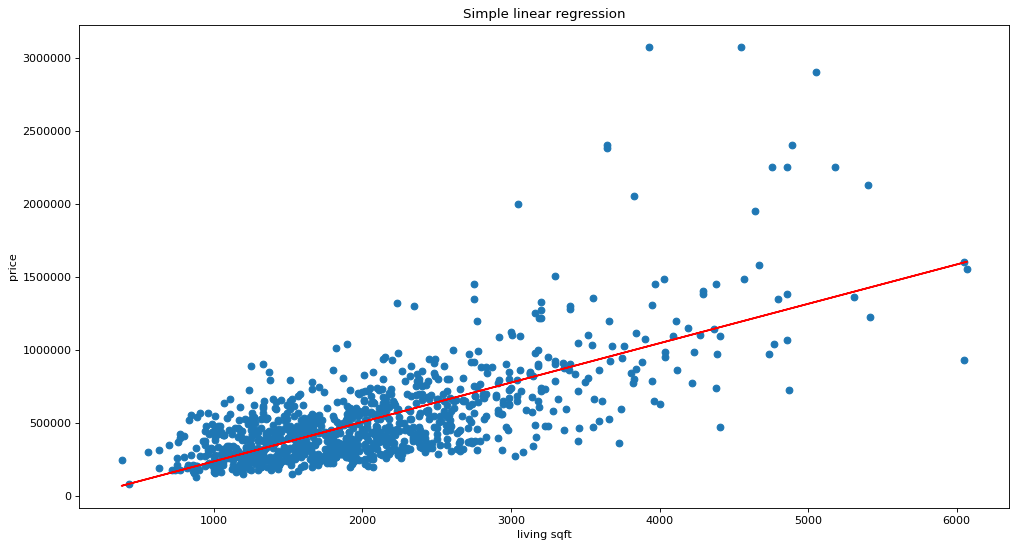

-32304.654721028113
[269.46205468]
0.49670880166311393


In [39]:
#b)

#Your code:
pr = model.predict(X)

plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'r')
plt.title("Simple linear regression")
plt.xlabel('living sqft')
plt.ylabel('price')
plt.ticklabel_format(style = 'plain')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

c) Now we create and plot higher-order polynomial regression models. LinearRegression was the polynomial regression too, but with degree=1
So here we train our model by adding polynomial features, which are degrees of the polynomial. And we use a pipeline for transformation data to the model.

Because we should fit data somehow to model and I couldn't do it without pipeline. Also we should look at shape of our data.
We can see that curves of our prediction are different, because of polynomial's degree. 

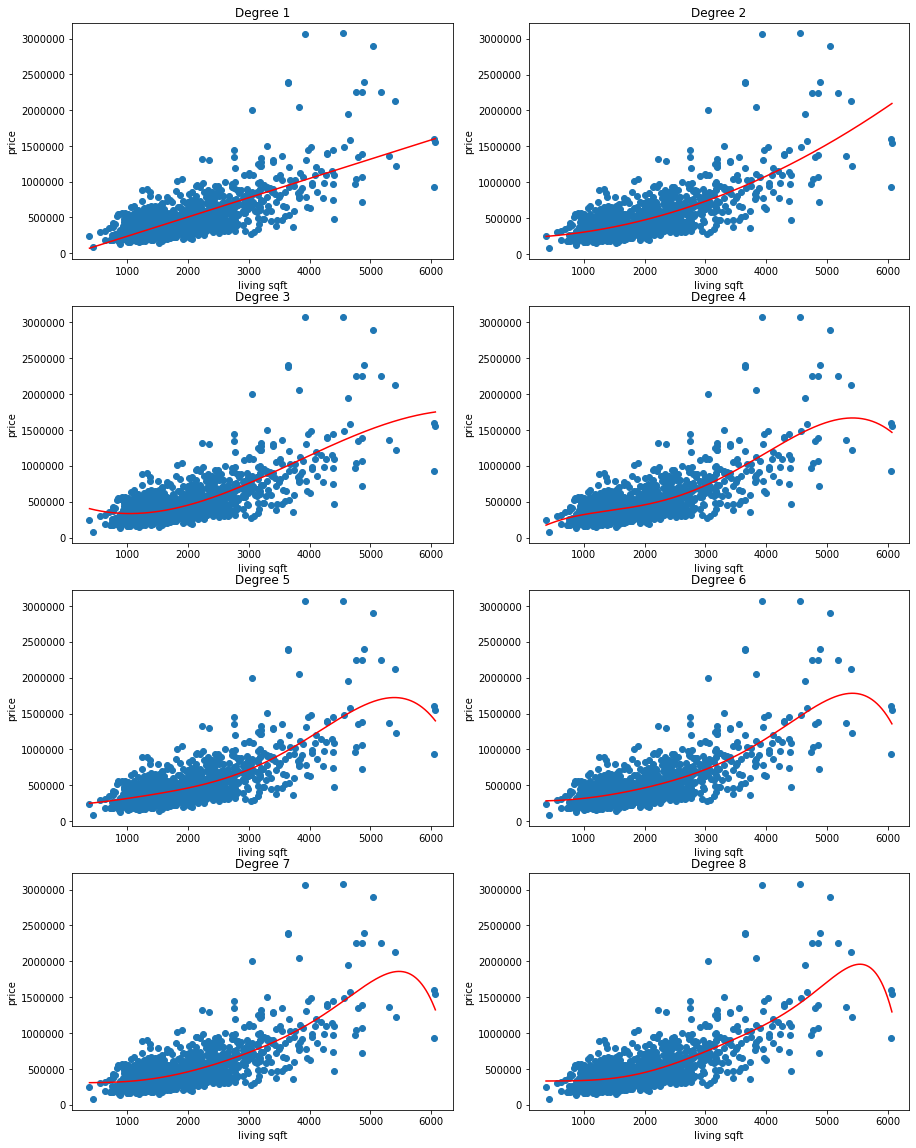

In [46]:
#c)
plt.figure(figsize=(15,20))
error, degree = [], []
error1, degree1 = [], []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    error1.append(mean_squared_error(y, pr))
    
    #errors
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    error.append(mean_squared_error(y, y_pr))
    degree.append(order)

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    ax.title.set_text('Degree {d}'.format(d=order))
    ax.xaxis.label.set_text('living sqft')
    ax.yaxis.label.set_text('price')
    ax.ticklabel_format(style = 'plain')
  
   



```
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    error.append(mean_squared_error(y, y_pr))
    degree.append(order)
```
This part of code calculates mean squared error. Mean Squared Error (MSE): it squares the absolute values of the errors. Also the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.


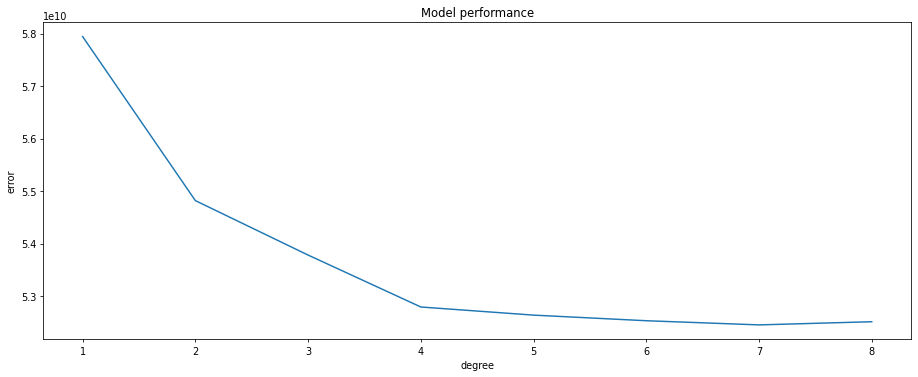

In [32]:
#Your code:
plt.figure(figsize=(16, 6), dpi=70)
plt.plot(degree, error)
plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.show()


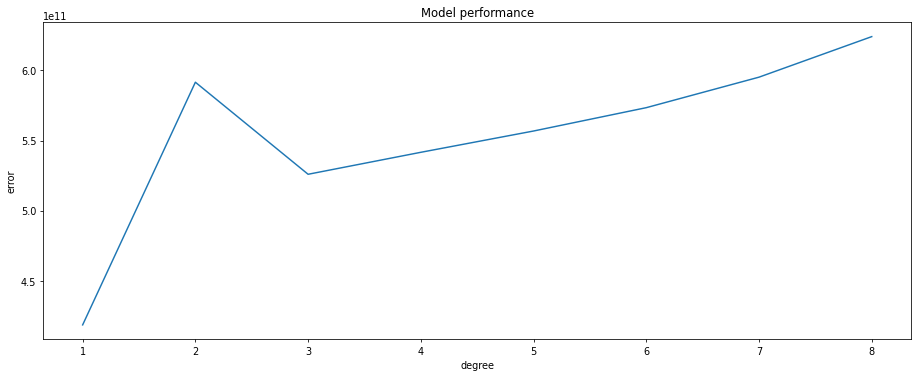

In [31]:
plt.figure(figsize=(16, 6), dpi=70)
plt.plot(degree, error1)
plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

Here we split data into the training sample and the test sample and repeat our steps. We have two train data_set and two test data_set and do the same things which I described previously.

In [20]:
#a)
error_train, error_test, degree = [], [], []
model_linear = LinearRegression()
for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    poly = PolynomialFeatures(order, include_bias = False)
    x_train_poly = poly.fit_transform(X_train)
    x_test_poly = poly.fit_transform(X_test)
    #errors
    model_linear.fit(x_train_poly, y_train)
    y_train_pr = model_linear.predict(x_train_poly)
    y_test_pr = model_linear.predict(x_test_poly)

    error_train.append(mean_squared_error(y_train, y_train_pr))
    error_test.append(mean_squared_error(y_test, y_test_pr))
    degree.append(order)


Here we have two plots and we can see difference between test and train datasets. That train dataset has less error because of we trained this model on this data. But we have higher error from test dataset, because of model "saw" this data first time.

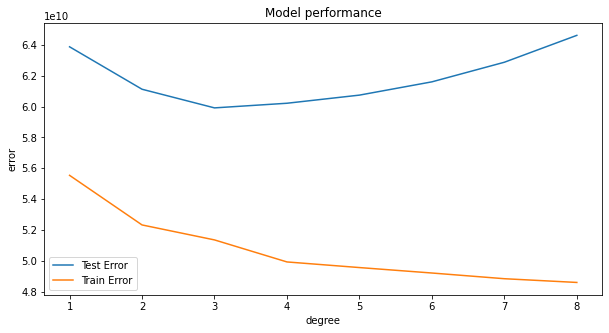

In [21]:
plt.figure(figsize=(10,5))
plt.plot(degree, error_test, label="Test Error")
plt.plot(degree, error_train, label="Train Error")

plt.title("Model performance")
plt.xlabel('degree')
plt.ylabel('error')
plt.legend()
plt.show()

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Here we train model to predict sqft_living for a given house price. We do the same steps how previously. But we have others input and output-predicton values.

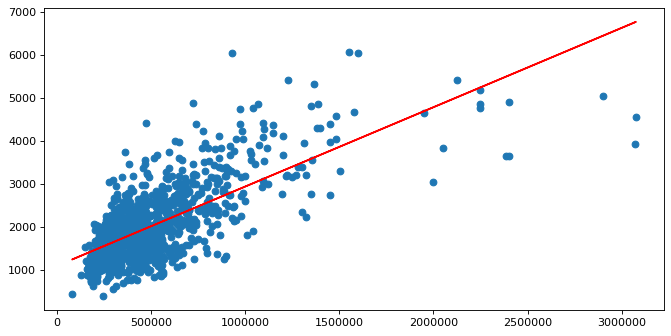

In [22]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model_linear = LinearRegression()
model_linear.fit(X,y)
y_pr = model_linear.predict(X)

plt.figure(figsize=(10,5),dpi=80)
plt.scatter(X,y)
plt.plot(X,y_pr, color = 'r')
plt.ticklabel_format(style = 'plain')
plt.show()

We apply more features and propose better model for predicting house prices. Here we just add more features for our model, like bedrooms, bathrooms, floors etc. So our model has more data for learning, also I experimented with size of training and test datasets. Train_test_split helps to us split data to train and test datasets. And I changed size of test dataset to 0.3=30% and model has 0.7=70% for training dataset.

And we got less mean_squared_error than previous model

In [53]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
X = house_df[['sqft_living', 'grade', 'view', 'bedrooms', 'bathrooms', 'yr_renovated', 'floors', 'condition']].values.reshape(-1,8)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749267368.97092
Mean squared error equals: 46589747150.67634
